In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune

summer_fits = Polyfit('summer_data_4alphaS/fits.npz', input_h5='summer_data_4alphaS/4alphas_50runs_inputdata.h5',
 order=3, covariance = True, fit_obs = list(range(1,16)), cpu = True, pdf_uncertainty = True)
#take first two bins of first 15 observables (which have 8 bins each)
target_bins = [i for i in range(8*15) if i%8 == 0 or i%8 == 1]
summer_tune_no_err = Paramtune('summer_data_4alphaS/fits.npz', 'summer_data_4alphaS/HEPData-ins1736531-v1-csv.h5',
 covariance = False, target_bins = target_bins, cpu = True)
summer_tune_cov = Paramtune('summer_data_4alphaS/fits.npz', 'summer_data_4alphaS/HEPData-ins1736531-v1-csv.h5',
 covariance = True, target_bins = target_bins, cpu = True)


Filtered 111792 of 134343 total bins for invalid input
Choosing to fit observables with ['d01-', 'd02-', 'd03-', 'd04-', 'd05-', 'd06-', 'd07-', 'd08-', 'd09-', 'd10-', 'd11-', 'd12-', 'd13-', 'd14-', 'd15-']
Fitting 945 of 945: /ATLAS_2019_I1736531/d15-x01-y01[AUX_pdfup]#6               
Fits written to summer_data_4alphaS/fits.npz
loading  summer_data_4alphaS/fits.npz
Calculated inital guess:  [0.11647235 0.12415498 0.14400615 0.10880583]
Tuned Parameters:  [0.116786   0.1294203  0.12563118 0.10280156] , Objective =  1365.9694121354019 , chi2/ndf =  0.06614354700656505
Covariance of Tuned Parameters:  [[ 6.11152488e-06 -2.44076282e-07 -1.63800606e-06  7.38319037e-07]
 [-2.44076282e-07  1.12494247e-06 -3.96762712e-06 -2.10008146e-07]
 [-1.63800606e-06 -3.96762712e-06  3.55674543e-05 -7.01191845e-06]
 [ 7.38319037e-07 -2.10008146e-07 -7.01191845e-06  1.34494032e-05]]
loading  summer_data_4alphaS/fits.npz
Calculated inital guess:  [0.12245072 0.12966268 0.10953239 0.17207152]
Tuned Para

In [9]:
import jax.numpy as jnp
summer_tune_cov.objective(summer_tune_cov.p_opt.x, *summer_tune_cov.obj_args)
summer_tune_cov.objective(jnp.array([0.127, 0.126, 0.127, 0.140]), *summer_tune_cov.obj_args)

Array(112.97551976, dtype=float64)

['TSalphaS' 'MPIalphaS' 'SSalphaS' 'SPalphaS']
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
[0.127 0.126 0.127 0.14 ]
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
[0.127 0.126 0.127 0.14 ]
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
[0.127 0.126 0.127 0.14 ]
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
[0.127 0.126 0.127 0.14 ]
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
[0.127 0.126 0.127 0.14 ]
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
[0.127 0.126 0.127 0.14 ]
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
[0.127 0.126 0.127 0.14 ]
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
[0.127 0.126 0.127 0.14 ]


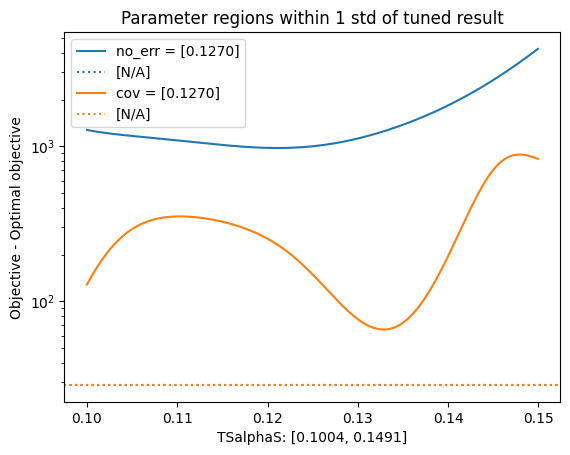

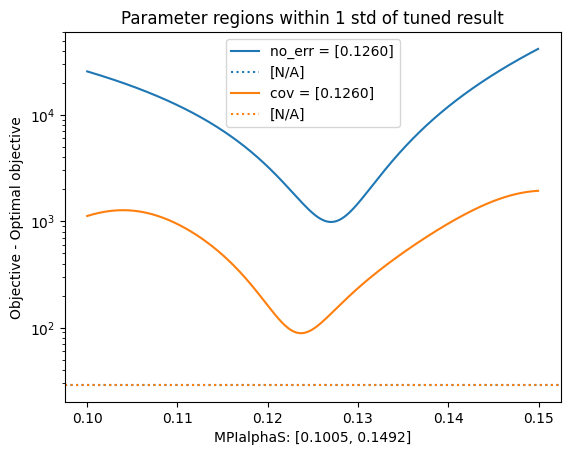

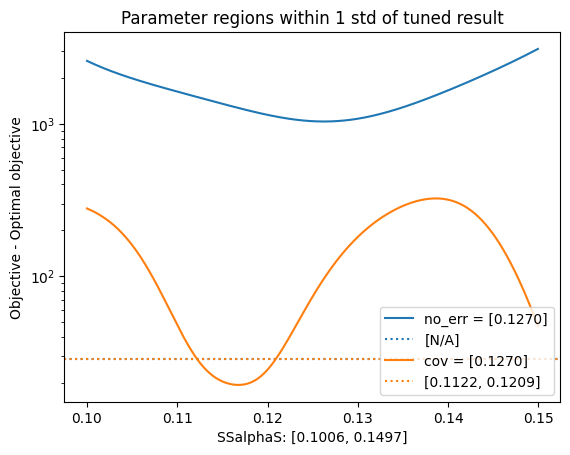

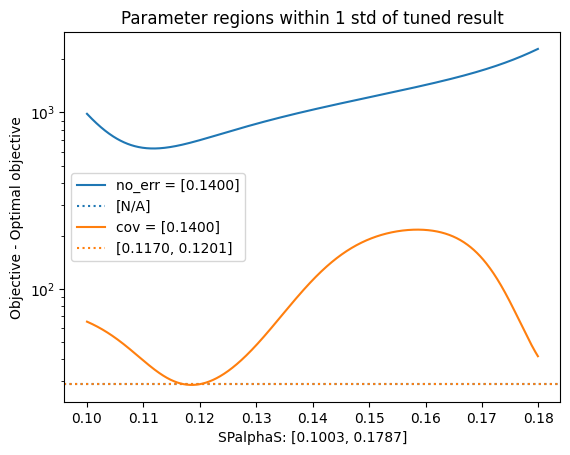

In [10]:
import jax.numpy as jnp
graph_range = [0.1, 0.15]
print(summer_tune_no_err.fits.param_names)
center = jnp.array([0.127, 0.126, 0.127, 0.140])
l = True
summer_tune_no_err.graph_objective(['TSalphaS'], center = center, graph_range = graph_range, log_scale = l)
summer_tune_cov.graph_objective(['TSalphaS'], center = center, new_figure = False, graph_range = graph_range, log_scale = l)
summer_tune_no_err.graph_objective(['MPIalphaS'], center = center, graph_range = graph_range, log_scale = l)
summer_tune_cov.graph_objective(['MPIalphaS'], center = center, new_figure = False, graph_range = graph_range, log_scale = l)
summer_tune_no_err.graph_objective(['SSalphaS'], center = center, graph_range = graph_range, log_scale = l)
summer_tune_cov.graph_objective(['SSalphaS'], center = center, new_figure = False, graph_range = graph_range, log_scale = l)
summer_tune_no_err.graph_objective(['SPalphaS'], center = center, graph_range = [0.1,0.18], log_scale = l)
summer_tune_cov.graph_objective(['SPalphaS'], center = center, new_figure = False, graph_range = [0.1,0.18], log_scale = l)

In [12]:
import numpy as np
print(summer_tune_no_err.p_opt.x)
print(summer_tune_no_err.objective(summer_tune_no_err.p_opt.x, *summer_tune_no_err.obj_args))
print(summer_tune_no_err.objective(jnp.array([0.127, 0.126, 0.127, 0.140]), *summer_tune_no_err.obj_args))
print(summer_tune_cov.p_opt.x)
print(summer_tune_cov.objective(summer_tune_cov.p_opt.x, *summer_tune_cov.obj_args))
print(summer_tune_cov.objective(jnp.array([0.127, 0.126, 0.127, 0.140]), *summer_tune_cov.obj_args))


[0.116786   0.1294203  0.12563118 0.10280156]
1365.9694121354019
2402.410082647002
[0.10375224 0.13051814 0.10144091 0.14942258]
0.7853231007032646
112.97551975698993


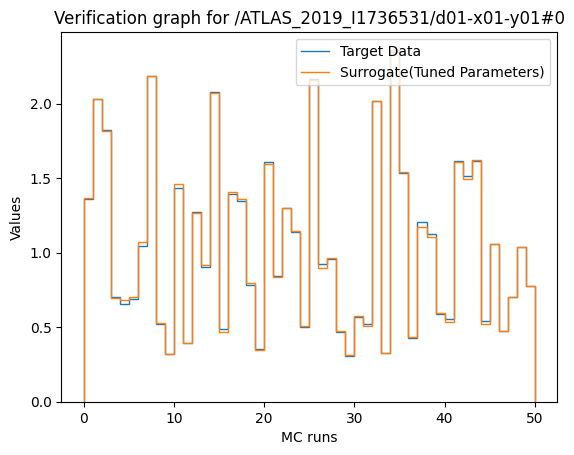

In [19]:
summer_fits.graph_bin("/ATLAS_2019_I1736531/d01-x01-y01#0")

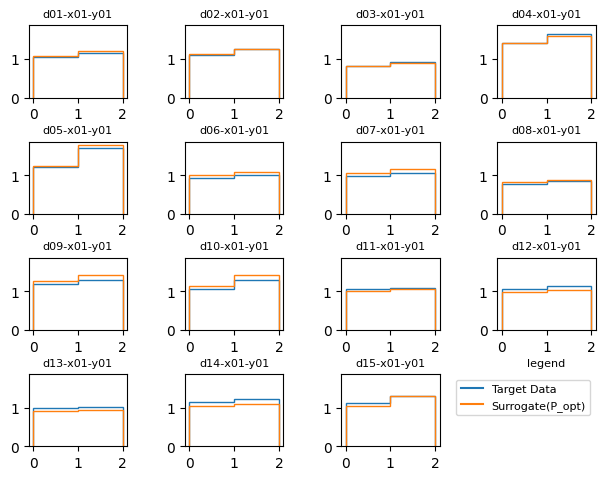

In [20]:
summer_tune_no_err.graph_tune_all()

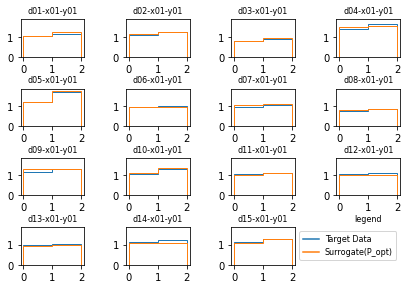

In [5]:
summer_tune_cov.graph_tune_all()

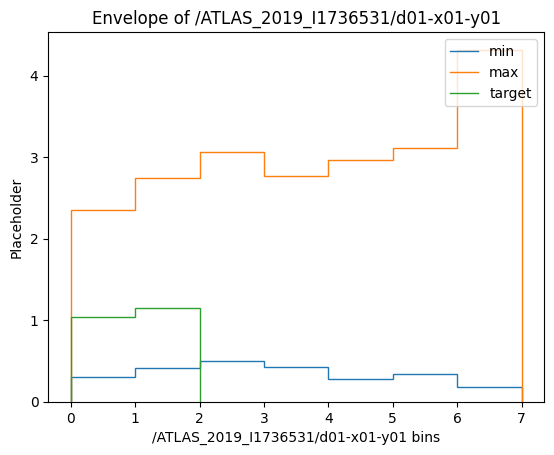

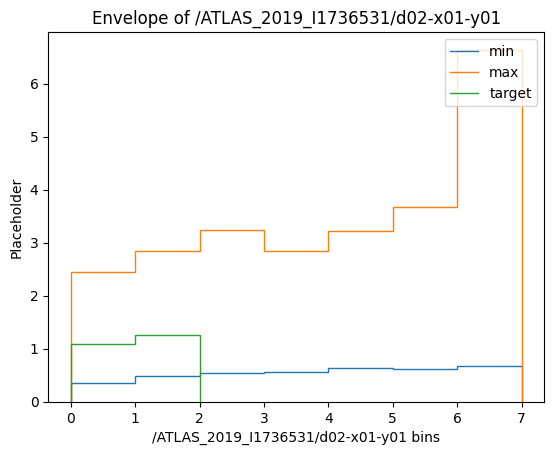

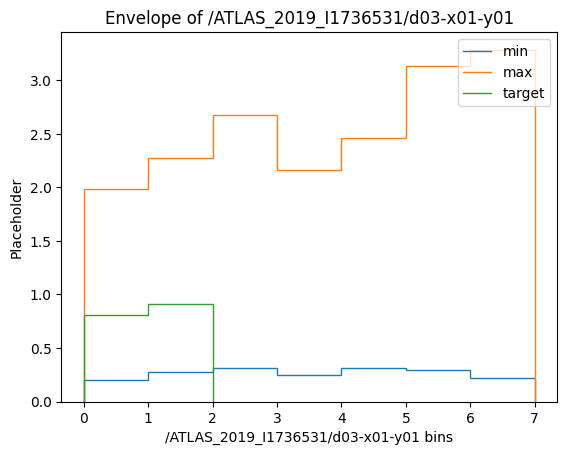

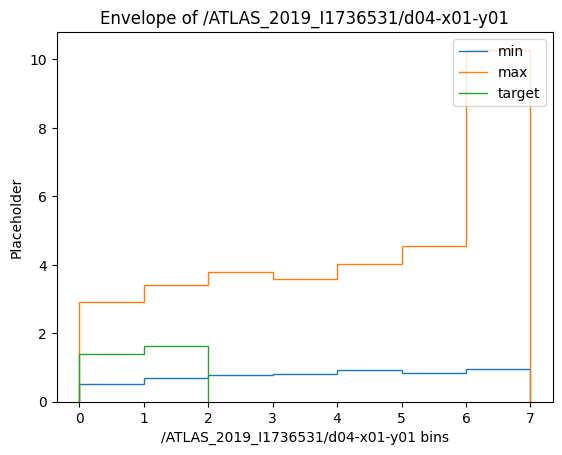

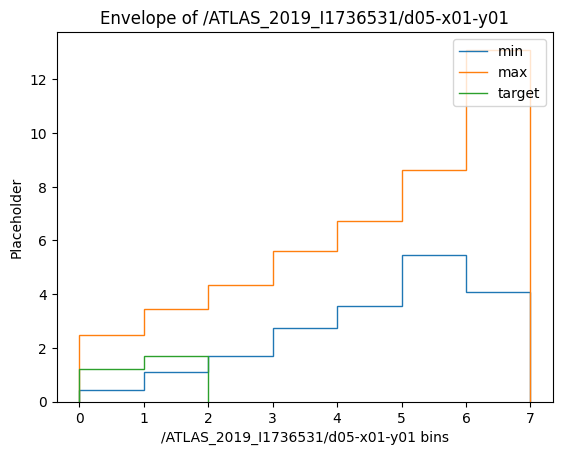

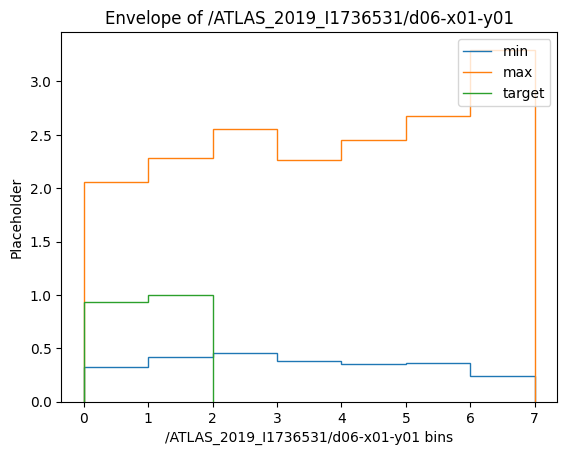

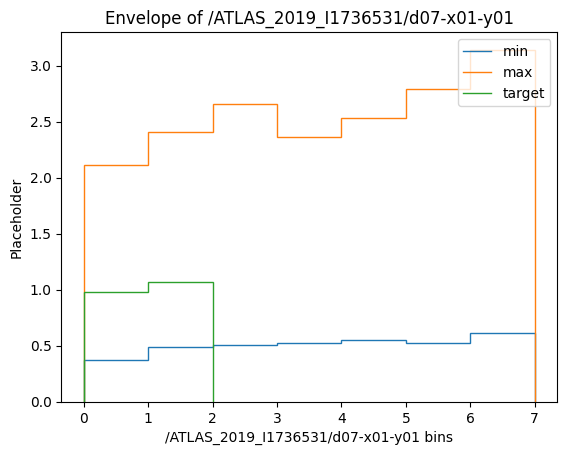

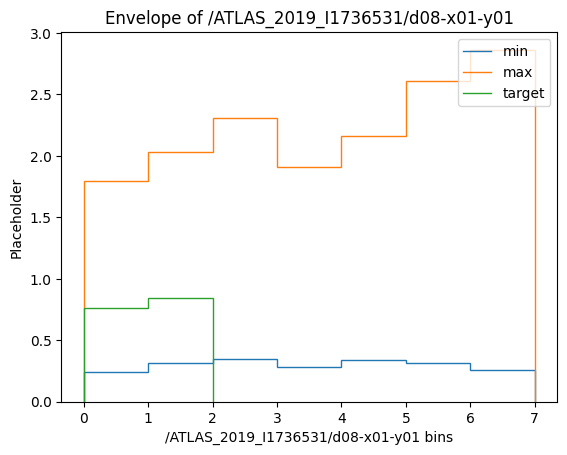

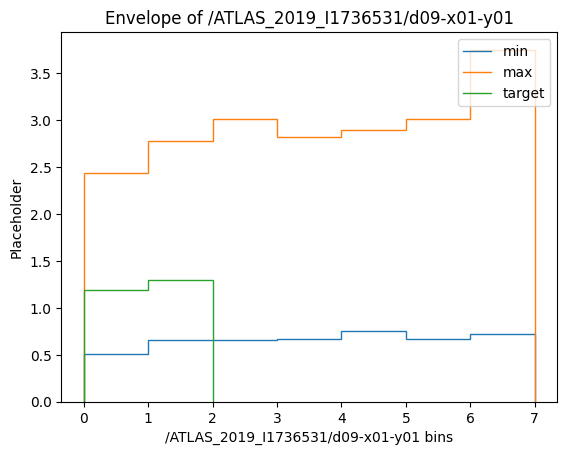

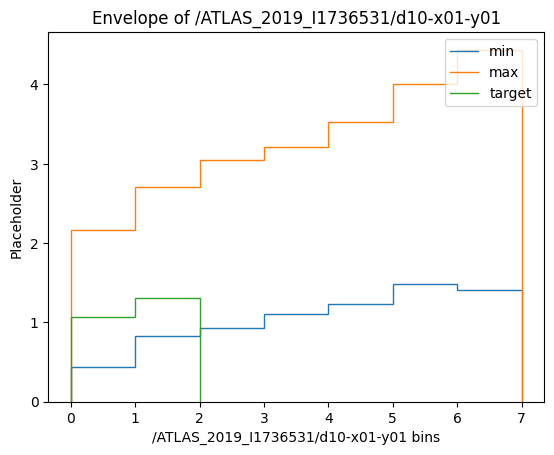

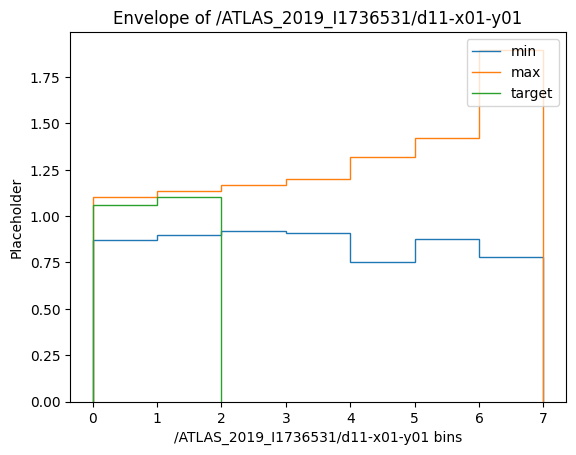

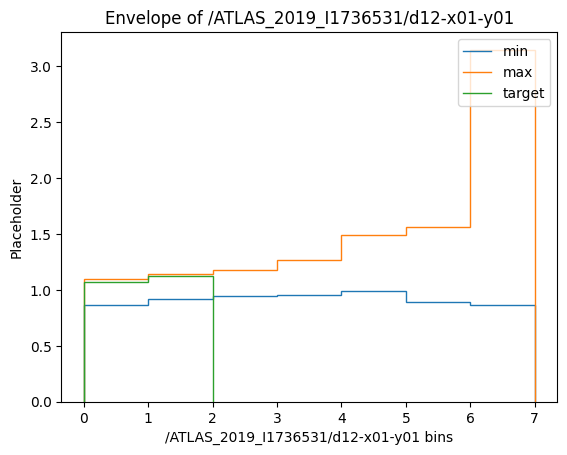

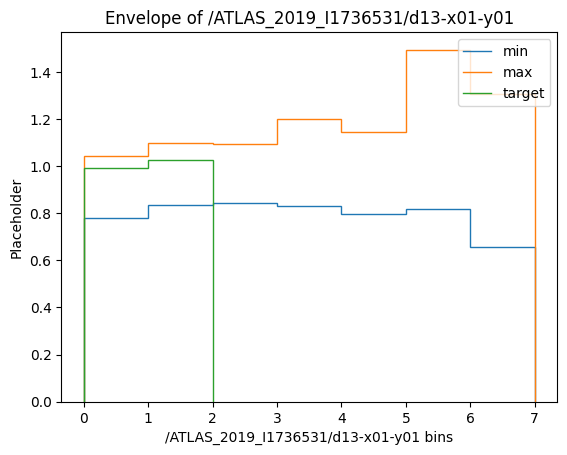

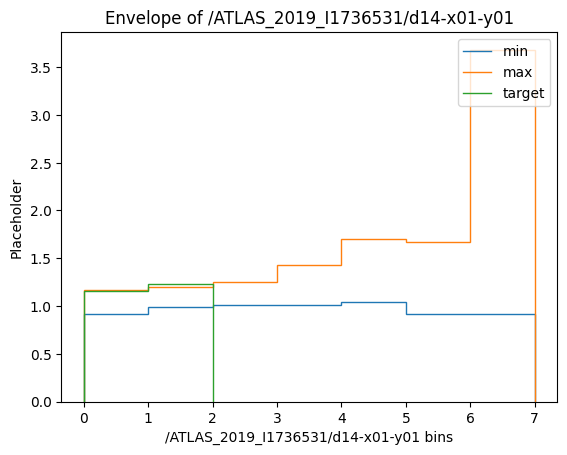

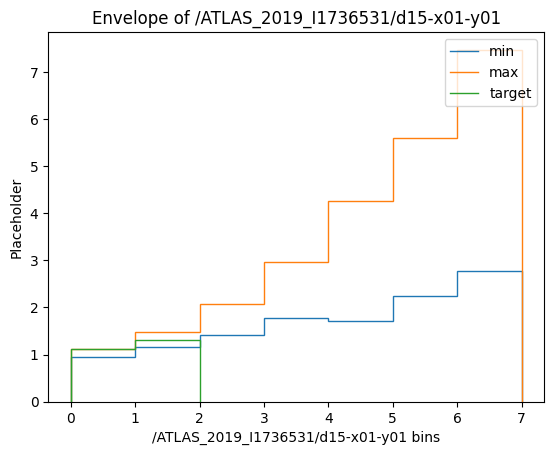

In [16]:
summer_tune_cov.graph_envelope_target()